# ![.right](https://lh6.ggpht.com/wUrTIhpHPVqw_VPCdhbSiF5TXlBlLyRHdH1gsII_y5NkgYKzbbj7cC2l6AGoVq-JN0U=w100 "MSDS 7331 Data Mining - Project 1")


# Project: Analysis of NASA Workforce Data - Mini Lab RESUBMISSION

---



# Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

---
# RESUBMISSION Additions
* Removed all unnecessary content from Lab 1
* Training and Testing Split
    - Used 4 cv iterations instead of 3
    - Used a 75/25 split on the data instead of 80/20
* Added an interactive widget to play around with the cost parameter in the regression object
    - Added description of effects of changing cost parameter
* Added Plot of Normalized weights

---
# Table of Contents

- [SVM & Logistic Regression Modeling](#SLR)

- [Training and Testing Split](#TT)

- [Logistic Regression - Create the Model](#LR)

- [Support Vector Machine](#SVM)

- [Support Vector Explination](#SVE)

- [Classification Comparison](#CC)

- [Acknowledgement](#ak)

- [Appendix](#a)




### Excel Import to verify data
<span style="color:red">
NOTE: In order to run these files, you will need "NEW_NASA_2006.xls","NEW_NASA_2007.xls" and "NASA_2008.xls" as these are sensitive materials, please contact Bill Kerneckel for download. 
</span>

# Data Import and Cleaning
All data cleaning commentary are given in Lab 1. 

In [24]:
#load python libaries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as pl
import seaborn as sns
import glob
import sys
import os
import warnings
import ggplot
import datetime
import time
from datetime import date

In [2]:
%matplotlib inline

In [4]:
#load data file
data_file = pd.read_excel('NEW_NASA_2006.xlsx') 
data_file2 = pd.read_excel('NEW_NASA_2007.xlsx') 
data_file3 = pd.read_excel('NASA_2008.xlsx') 
#you'll have to change the file path to your working directory

#removing 1st row from datasets
data_file.drop(0, axis = 0,inplace = True)
data_file2.drop(0, axis = 0,inplace = True)
data_file3.drop(0, axis = 0,inplace = True)

#note: please be patient as this will take a few minutes to run

In [12]:
#combining dataframes 
df = [data_file, data_file2, data_file3]

cdf = pd.concat(df, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
cdf.reset_index()

,index,Hist_yr,agency,bdyr,coopsch,coopyr,currgrddte,dtystn_ind,dtystnname,edlev,...,secsch,secyr,sex,step_emp,supind,suplev,tenure,time_in_grade,typappt,worksch
0,1,2006,NN51,1900,NaN,NaN,10/08/1989,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",09,...,NaN,0,F,9,8,34,1,205.46,10,F
1,2,2006,NN51,1980,NaN,NaN,09/22/2002,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",13,...,NaN,0,F,6,2,26,1,50.00,10,F
2,3,2006,NN23,1986,NaN,NaN,07/21/1996,88,"HAMPTON,HAMPTON,VIRGINIA",10,...,NaN,0,M,8,8,34,1,124.04,10,F
3,4,2006,NN64,1994,NaN,NaN,04/17/2005,88,"STENNIS SPACE CENTER, HANCOCK, MISSISSIPPI",21,...,NaN,0,M,2,2,26,1,19.17,10,F
4,5,2006,NN72,2006,NaN,NaN,07/23/2006,29,"HOUSTON,HARRIS,TEXAS",13,...,NaN,0,F,10,8,34,3,3.98,20,F
5,6,2006,NN62,1972,NaN,NaN,12/01/1997,32,"REDSTONE ARSENAL,MADISON,ALABAMA",21,...,6882,1970,M,6,8,34,1,107.69,10,F
6,7,2006,NN51,1900,NaN,NaN,02/27/2000,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",04,...,NaN,0,M,5,8,34,1,80.85,10,F
7,8,2006,NN72,1986,NaN,NaN,04/26/1998,29,"HOUSTON,HARRIS,TEXAS",17,...,3669,1982,M,6,8,34,1,102.88,10,F
8,9,2006,NN51,1978,NaN,NaN,09/27/1987,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",21,...,3918,1971,M,0,2,32,1,229.85,10,F
9,10,2006,NN10,1987,NaN,NaN,05/14/2006,80,"WASHINGTON,DISTRICT OF COLUMBIA",17,...,3915,1974,F,6,2,34,1,6.27,10,F


In [13]:
# dropping columns we are not using for the analysis
cdf.drop('agency', axis=1, inplace=True)
cdf.drop('coopsch', axis=1, inplace=True)
cdf.drop('coopyr', axis=1, inplace=True)
cdf.drop('dtystn_ind', axis=1, inplace=True)
cdf.drop('dtystnname', axis=1, inplace=True)
cdf.drop('edlev', axis=1, inplace=True)
cdf.drop('foulev', axis=1, inplace=True)
cdf.drop('fousch', axis=1, inplace=True)
cdf.drop('fouyr', axis=1, inplace=True)
cdf.drop('nasattl', axis=1, inplace=True)
cdf.drop('probenddte', axis=1, inplace=True)
cdf.drop('promontedte', axis=1, inplace=True)
cdf.drop('secsch', axis=1, inplace=True)
cdf.drop('seclev', axis=1, inplace=True)
cdf.drop('typappt', axis=1, inplace=True)
cdf.drop('worksch', axis=1, inplace=True)

In [14]:
cdf = cdf[cdf.bdyr != 1900]
cdf.salary = cdf.salary.astype(np.float64)
cdf.time_in_grade = cdf.time_in_grade.astype(np.float64)
cdf.suplev = cdf.suplev.astype(np.float64)


In [15]:
# converting bdyr column to age
now = datetime.datetime.now()
cdf['bdyr'] = cdf['bdyr'].apply(pd.to_numeric, errors='coerce') 
cdf['age'] = now.year - cdf['bdyr']

In [20]:
cdf['salary_range'] = pd.cut(cdf.salary,[0,50000,100000,135000, 150000],4,
                             labels=['Entry_Level','Jr_Level','Mid_Level', 'Mgmt_Level' ])
cdf.dropna(inplace=True)
# convert cdf variable back to "df" nomenclature
df = pd.DataFrame(cdf)

In [21]:
#manipulate employee start date 'eoddte' to get 'service' variable
#convert 'eoddte' to series
df.eod = pd.Series(df['eoddte'])
#convert 'eoddte' series to 'eoddte' datetime
df['eoddte'] = pd.to_datetime(df.eod) 
#convert eod to be just the year
df['eodyr'] = df['eoddte'].map(lambda x: x.year)

In [22]:
#convert high school graduation year "hiyr" to be numeric
df['hiyr'] = df['hiyr'].apply(pd.to_numeric, errors='coerce')
#after looking at a crosstab, we can see that there are a lot of "high school graduation year: 0"
#this is a data entry error, let's remove these entries...
df = df[df.hiyr != 0]
pd.crosstab(index=df["hiyr"],columns="hiyr")
#now the 0 entries have been removed

#subtract employee hire date from high school graduation date to get exprience
df['experience'] = df['eodyr'] - df['hiyr']

In [35]:
#get the 'service' variable by subtracting current date from hire date
today = date.today()
df['service'] = today - df['eoddte']
#generate retirement potential by subtracting retirement eligibility date from todays date  
#convert retoptdte to series for conversion to datetime format
df.retoptdte = pd.Series(df['retoptdte'])
#convert 'retoptdte' series to 'eoddte' datetime
df['retoptdte'] = pd.to_datetime(df.retoptdte) 
#generate 'retpot' variable
df['retpot'] = today - df['retoptdte']

In [36]:
df_grouped = df.groupby(by=['grade','sex'])

In [37]:
df_grouped = df.groupby(by=['grade','sex'])
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[['grade','sex']] = df[['grade','sex']]

In [39]:
df['Hist_yr'] = df['Hist_yr'].astype(int)
df_yrgroup = df.groupby(by=['Hist_yr'])

# End of Preliminary Data Cleaning from Lab 1



---
<div id='SLR'/>
# MINI-LAB: SVM & LOGISTIC REGRESSION MODELING

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37412 entries, 2 to 18798
Data columns (total 41 columns):
Hist_yr          37412 non-null int32
bdyr             37412 non-null float64
currgrddte       37412 non-null object
eoddte           37412 non-null datetime64[ns]
frscdte          37412 non-null object
fscdte           37412 non-null object
grade            37412 non-null object
hilev            37412 non-null object
hisch            37412 non-null object
hiyr             37412 non-null int64
install          37412 non-null object
lastpromodte     37412 non-null object
leqdte           37412 non-null object
loccde           37412 non-null object
ncc              37412 non-null object
nextwigdte       37412 non-null object
occode           37412 non-null object
opmtitle         37412 non-null object
orga             37412 non-null object
orgabr           37412 non-null object
orgadir          37412 non-null object
orgadiv          37412 non-null object
orgasec          37412 non

In [202]:
# creating new dataframe. Keeping original seperate.
DF_NoT = df

In [203]:
# perform one-hot encoding of the categorical data "salary_range" and "rno" (ethnic background).
tmp_df = pd.get_dummies(df.salary_range,prefix='salary_range')
tmp_df2 = pd.get_dummies(df.rno,prefix='rno')

DF_NoT = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
DF_NoT = pd.concat((DF_NoT,tmp_df2),axis=1)

In [204]:
# Delete time/dates - can't be used in L-Regression
del DF_NoT['eoddte']
del DF_NoT['retoptdte']
del DF_NoT['salary_range']
del DF_NoT['currgrddte']
del DF_NoT['frscdte']
del DF_NoT['fscdte']
del DF_NoT['hisch']
del DF_NoT['leqdte']
del DF_NoT['loccde']
del DF_NoT['ncc']
del DF_NoT['opmtitle']
del DF_NoT['occode']
del DF_NoT['orga']
del DF_NoT['orgabr']
del DF_NoT['orgadir']
del DF_NoT['orgadiv']
del DF_NoT['orgasec']
del DF_NoT['postenure']
del DF_NoT['tenure']
del DF_NoT['supind']
del DF_NoT['suplev']
del DF_NoT['rno']
del DF_NoT['rno_000010']  
del DF_NoT['rno_100100'] 
del DF_NoT['rno_100001'] 
del DF_NoT['rno_100010'] 
del DF_NoT['rno_100101'] 
del DF_NoT['rno_100000'] 
del DF_NoT['rno_011000'] 
del DF_NoT['rno_001101'] 
del DF_NoT['rno_010001'] 
del DF_NoT['rno_010101'] 
del DF_NoT['rno_001100'] 
del DF_NoT['rno_010000'] 
del DF_NoT['rno_010100'] 
del DF_NoT['rno_001001'] 
del DF_NoT['rno_001000'] 
del DF_NoT['rno_000101'] 
del DF_NoT['rno_000100'] 
del DF_NoT['rno_000011'] 
del DF_NoT['rno_101000'] 
del DF_NoT['rno_101101'] 
del DF_NoT['rno_110000'] 
del DF_NoT['rno_110001'] 
del DF_NoT['rno_110101'] 
del DF_NoT['rno_111111'] 

In [205]:
today = date(2008, 12, 31) #modify if more datasets are added
DF_NoT.service = DF_NoT.service / np.timedelta64(1, 'D')
DF_NoT.retpot = DF_NoT.retpot / np.timedelta64(1, 'D')

In [206]:
DF_NoT.lastpromodte = pd.Series(DF_NoT['lastpromodte'])
#convert 'eoddte' series to 'eoddte' datetime
DF_NoT['lastpromodte'] = pd.to_datetime(DF_NoT.lastpromodte) 
DF_NoT['lastpromodte'] = today - DF_NoT['lastpromodte']

In [207]:
#removing the day to calculate a number
DF_NoT.lastpromodte = DF_NoT.lastpromodte / np.timedelta64(1, 'D')

DF_NoT.nextwigdte = pd.Series(DF_NoT['nextwigdte'])
DF_NoT['nextwigdte'] = pd.to_datetime(DF_NoT.nextwigdte) 
DF_NoT['nextwigdte'] = today - DF_NoT['nextwigdte']
DF_NoT.nextwigdte = DF_NoT.nextwigdte / np.timedelta64(1, 'D')

DF_NoT.retdiscdte = pd.Series(DF_NoT['retdiscdte'])
DF_NoT['retdiscdte'] = pd.to_datetime(DF_NoT.retdiscdte) 
DF_NoT['retdiscdte'] = today - DF_NoT['retdiscdte']
DF_NoT.retdiscdte = DF_NoT.retdiscdte / np.timedelta64(1, 'D')

In [208]:
DF_NoT['IsMale'] = DF_NoT.sex=='M' 
DF_NoT.IsMale = DF_NoT.IsMale.astype(np.int)
del DF_NoT['sex']

<div id='TT'/>
# Training and Testing Split

In order to start training the data, we have decided to grab 75% of the instances for the initial training and then validate the model on the remaining 25%. We will repeat this process four times.

In [209]:
from sklearn.cross_validation import ShuffleSplit
DF_Reg = DF_NoT
# we want to predict the X and y data as follows:
if 'salary_range_Jr_Level' in DF_Reg: # We chose Salary_range_Jr_level as our binary. (1 if in the junior level, 0 if not)
    y = DF_Reg['salary_range_Jr_Level'].values 
    del DF_Reg['salary_range_Jr_Level'] 
    X = DF_Reg.values # use everything else to predict!

#    training and testing splits
num_cv_iterations = 4 #We will use 4 iterations.
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=4, #num_cv_iterations
                         test_size  = 0.25) #We will use a 3/4 split.  75% training data and 25% validation data.
                         
print(cv_object)

ShuffleSplit(37412, n_iter=4, test_size=0.25, random_state=None)


<div id='LR'/>
# Logistic Regression - Create the Model

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# Create a reusable regression object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
   
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  
    y_hat = lr_clf.predict(X_test)

    # print accuracy for confusion matrix
    #acc = mt.accuracy_score(y_test,y_hat)
    #conf = mt.confusion_matrix(y_test,y_hat)
    
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.882283759222
confusion matrix
 [[4787  498]
 [ 603 3465]]
====Iteration 1  ====
accuracy 0.929755158773
confusion matrix
 [[4867  417]
 [ 240 3829]]
====Iteration 2  ====
accuracy 0.877258633593
confusion matrix
 [[4762  515]
 [ 633 3443]]
====Iteration 3  ====
accuracy 0.965465626002
confusion matrix
 [[5128  146]
 [ 177 3902]]


After running four iterations of cross validation through our logistic regression function, we have found that our model is roughly between 86% and 90% accurate.

In [211]:
from ipywidgets import widgets as wd
from sklearn.cross_validation import cross_val_score

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001, 10.0, 1.0),__manual=True)

<function __main__.lr_explor>

We played around with different parameters and this is what we found:
 - When penalty was set to 'l1' our accuracy jumped to 100%, and when penalty was set to 'l2' our model accuracy dropped to approximately 87%. We chose to stick with penalty = 'l2'.
 - Using the values 0.001 through 10.0, for C in the Regression object made some differences in our model accuracy. We found that when the cost was higher (between 3.0 and 10.0, compared to the original 1.0) the accuracy of our model was in the mid 90%'s more often, sometimes reaching as high as 98%.

In [212]:
# The weights before normalization

weights = lr_clf.coef_.T 
variable_names = DF_Reg.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])   

Hist_yr has weight of 0.0393655579864
bdyr has weight of -0.0124812943075
grade has weight of 1.75246995488
hilev has weight of 0.00612542436449
hiyr has weight of -0.0124812943075
install has weight of -0.000110773733179
lastpromodte has weight of 0.000105448560535
nextwigdte has weight of -0.000461197166293
retdiscdte has weight of -1.35277605004e-05
salary has weight of -0.000206966216887
secyr has weight of 1.05205399771e-05
step_emp has weight of 0.115379746958
time_in_grade has weight of 0.00822624072283
age has weight of 0.0053057133642
eodyr has weight of -0.0163174644492
experience has weight of -0.00383617012445
service has weight of -0.000142855175952
retpot has weight of -4.43094182717e-05
salary_range_Entry_Level has weight of -0.504845571651
salary_range_Mid_Level has weight of -1.03691166942
salary_range_Mgmt_Level has weight of -0.0274938173767
rno_000001 has weight of -0.016382988495
IsMale has weight of -0.0248513546587


---

<div id='WI'/>
# WEIGHTS INTERPERTATION

The weights are not interpretable because the attributes have vastly different ranges. We will normalize the features, re-run the full regression model, and then interpret the weights. The normalized attributes will provide weights that give more accurate insight to their effects.

In [213]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 
# find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less because all of the attributes have been normalized.
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,DF_Reg.columns) # combine attributes
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 1.0
[[5274    0]
 [   0 4079]]
Hist_yr has weight of -0.0293513048952
bdyr has weight of 0.0657610729021
grade has weight of 0.216914097068
hilev has weight of -0.10551076437
hiyr has weight of 0.0657610729021
install has weight of 0.0215327351391
lastpromodte has weight of 0.114116371142
nextwigdte has weight of 0.0294852139282
retdiscdte has weight of -0.0825234442293
salary has weight of -1.51457316005
secyr has weight of -0.0393854620453
step_emp has weight of -0.025152130635
time_in_grade has weight of 0.0861201359018
age has weight of -0.0657610729021
eodyr has weight of 0.0594532946863
experience has weight of -0.00634676510039
service has weight of -0.0618793528878
retpot has weight of 0.0444057474586
salary_range_Entry_Level has weight of -2.70680195684
salary_range_Mid_Level has weight of -4.57620173716
salary_range_Mgmt_Level has weight of -1.78014595586
rno_000001 has weight of -0.025979706844
IsMale has weight of -0.0596747568789


C:\Users\natha_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\natha_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\natha_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---

<div id='NWI'/>
# NORMALIZE WEIGHT INTERPRETATION

These weights are what is expected due how the Goverment controls variability with hiring and promotion schedules. According to these results, the largest wieght we can see is the variable title 'salary_range_Mid_Level' with a value of <strong>-4.621035350746709</strong>. As a whole, these weights are relatively low. We might want to investigate Step-Wise or Lasso varaible selection methods. Our dependent variable was 'salary_range_Jr_Level' and we acheived strong categorization. 

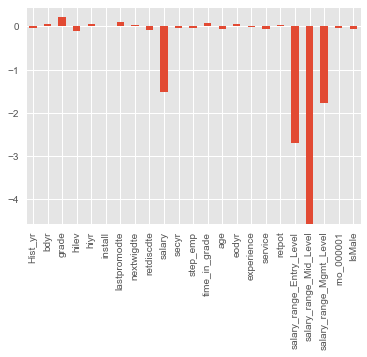

In [214]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=DF_Reg.columns)
weights.plot(kind='bar')
plt.show()

According to the plot of weights above, it would be beneficial to remove:
* 'salary' 
* 'salary_range_Entry_Level'
* 'salary_range_Mid_Level'
* 'salary_range_Mgmt_Level'
   
This will prevent the model from overfitting the data. These variables seemed to be too correlated to the response variable. This could also account for our high levels of accuracy.

In [215]:
DF_Reg2 = DF_Reg

In [216]:
del DF_Reg2['salary']
del DF_Reg2['salary_range_Entry_Level']
del DF_Reg2['salary_range_Mid_Level']
del DF_Reg2['salary_range_Mgmt_Level']

In [217]:
if 'salary_range_Jr_Level' in DF_Reg2:
    y = DF_Reg2['salary_range_Jr_Level'].values 
    del DF_Reg2['salary_range_Jr_Level']
    X = DF_Reg2.values

num_cv_iterations = 4
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=4, #num_cv_iterations
                         test_size  = 0.25)

In [218]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.93916390463
confusion matrix
 [[5018  358]
 [ 211 3766]]
====Iteration 1  ====
accuracy 0.913503688656
confusion matrix
 [[4851  457]
 [ 352 3693]]
====Iteration 2  ====
accuracy 0.880679995723
confusion matrix
 [[4742  493]
 [ 623 3495]]
====Iteration 3  ====
accuracy 0.877900138993
confusion matrix
 [[4763  516]
 [ 626 3448]]


In [226]:
scl_obj2 = StandardScaler()
scl_obj2.fit(X[train_indices]) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled2 = scl_obj2.transform(X[train_indices]) # apply to training
X_test_scaled2 = scl_obj2.transform(X[test_indices]) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf2 = LogisticRegression(penalty='l2', C=0.05) 
lr_clf2.fit(X_train_scaled2,y[train_indices])

y_hat2 = lr_clf2.predict(X_test_scaled2) # get test set precitions

acc2 = mt.accuracy_score(y[test_indices],y_hat2)
conf2 = mt.confusion_matrix(y[test_indices],y_hat2)
print('accuracy:', acc2 )
print(conf2 )

# sort these attributes and spit them out
zip_vars = zip(lr_clf2.coef_.T,DF_Reg2.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef2, name in zip_vars:
    print(name, 'has weight of', coef2[0]) # now print them out

C:\Users\natha_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\natha_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\natha_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


accuracy: 1.0
[[5279    0]
 [   0 4074]]
IsMale has weight of -2.69835758819
secyr has weight of -1.51687895149
hilev has weight of -0.100265964958
retdiscdte has weight of -0.0766578627028
eodyr has weight of -0.0685562230533
retpot has weight of -0.0652240869642
step_emp has weight of -0.0407709880108
Hist_yr has weight of -0.033744632026
time_in_grade has weight of -0.0283573145055
service has weight of -0.00706523183023
install has weight of 0.0193321634161
nextwigdte has weight of 0.0294476126325
rno_000001 has weight of 0.0436070331572
experience has weight of 0.061489360073
bdyr has weight of 0.0685562230533
hiyr has weight of 0.0685562230533
age has weight of 0.0923863370041
lastpromodte has weight of 0.116651209195
grade has weight of 0.223680115066


In [227]:
%matplotlib inline
plt.style.use('ggplot')

# ERROR IN THIS CODE< NEED TO FIX
weights2 = pd.Series(lr_clf2.coef_[0],index=DF_Reg2.columns)
weights2.plot(kind='bar')
plt.show()

ValueError: Wrong number of items passed 23, placement implies 19

---
<div id='SVM'/>
# SUPPORT VECTOR MACHINE

In [121]:
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 1.0
[[4251    0]
 [   0 3232]]


In [98]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(354, 23)
(354,)
[223 131]


---

<div id='sve'/>
# SUPPORT VECTOR EXPLANATION

The datasets we were working with was clearly classified. Binary groups were explicitly clear. Majority of the data seemed catagorical which made it easy for classification.

---

<div id='CC'/>
# CLASSIFICATION COMPARISON

In the contents of this dataset and for this lab, support vector machine (SVM) appears to be more accurate. Normally this would be an example of "overfiiting" but knowing where this dataset came from and how the U.S. Goverment Federal salaries are determined by congress and pay increases are set by a days-in-service schedule. See OPM General Pay Schedule: https://www.opm.gov/policy-data-oversight/pay-leave/pay-systems/general-schedule/. Since the "grade" variable and the "time in service" variable are used to determine salary, we suspect that including them in this logistic regression is giving us some results with multicolinearity. If we had more time, we would remove these variables and tune the regession again.

---
<div id='a'/>
# ACKNOWLEDGEMENTS

- Office of Personnel Management (OPM)
- National Aeronautics and Space Administration (NASA)
- NASA Johnson Space Center (JSC)


---
# APPENDIX

### SQL Query

A SQL query was written to pull the needed data from NASA's Human Resources Agency Workforce Microsoft SQL Database. The SQL query retrieves records for only active employee by calendar year.

```
SELECT
    [agency]
    ,convert(varchar(10),[apptntedte], 101) as apptntedte
    ,[bdyr]
    ,[citizen]
    ,[coopfld]
    ,[cooplev]
    ,[coopsch]
    ,[coopyr]
    ,convert(varchar(10),[currgrddte], 101) as currgrddte
    ,[dlrlimit]
    ,[dtystn_ind]
    ,[dtystnname]
    ,[dtysts]
    ,[edlev]
    ,convert(varchar(10),[eoddte], 101) as eoddte
    ,[finstm]
    ,[foufld]
    ,[foulev]
    ,[fousch]
    ,[fouyr
    ,convert(varchar(10),[frscdte], 101) as frscdte
    ,convert(varchar(10),[fscdte], 101) as fscdte
    ,convert(varchar(10),[fscdte_enhanced], 101) as fscdte_enhanced
    ,[grade]
    ,[graderetn]
    ,[hifld]
    ,[hilev]
    ,[hisch]
    ,[hiyr]
    ,[hrlimit]
    ,[install]
    ,[install_calc]
    ,convert(varchar(10),[lastpromodte], 101) as lastpromodte
    ,convert(varchar(10),[leqdte], 101) as leqdte
    ,[loccde]
    ,convert(varchar(10),[lwopntedte], 101) as lwopntedte
    ,[nasattl]
    ,[ncc]
    ,[ncc_old]
    ,convert(varchar(10),[nextwigdte], 101) as nextwigdte
    ,convert(varchar(10),[nscdte], 101) as nscdte
    ,[occode]
    ,[opmtitle]
    ,[orga]
    ,[orgabr]
    ,[orgadir]
    ,[orgadiv]
    ,[orgasec]
    ,[poi]
    ,[poscrit]
    ,[postenure]
    ,[prd]
    ,[probenddte]
    ,convert(varchar(10),[probenddte], 101) as probenddte
    ,[projpromo]
    ,convert(varchar(10),[promontedte], 101) as promontedte
    ,convert(varchar(10),[retdiscdte], 101) as retdiscdte
    ,convert(varchar(10),[retoptdte], 101) as retoptdte
    ,[rno]
    ,convert(varchar(10),[rscdte], 101) as rscdte
    ,[rtd]
    ,[secfld]
    ,[seclev]
    ,[secsch]
    ,[secyr]
    ,[sex]
    ,[spid]
    ,[step_emp]
    ,[stepretn]
    ,[super_diff]
    ,[supind]
    ,[suplev]
    ,[tenure]
    ,convert(varchar(10),[tenurebdte], 101) as tenurebdte
    ,[time_in_grade]
    ,[typappt]
    ,[worksch]
FROM [XXX].[XXX].[PerStat]
WHERE dtysts in ('a','c','f','i','l','m','p','v','y')
AND Hist_yr = 'ENTER 4 DIGIT YEAR'
```

